#### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

In [5]:
print(os.getcwd())  # get current working directory

C:\Users\Dell\Downloads\Imarticus_Work\PGA34\ML\Log_Reg\Project


In [6]:
# os.chdir(r'E:\\dataset') # chdir - change directory

In [7]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
df.shape
# rows = 26707,cols=34

(26707, 34)

In [9]:
df1 = df.copy()

In [10]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [11]:
df['unique_id'].nunique()

26707

In [12]:
df.drop('unique_id',axis=1,inplace=True)
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

#### Data Preprocessing

#### 1) Handling Null Values

In [13]:
def null_value_per(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'NullCount':nv.values,
                         'PerNull':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('PerNull',ascending=False)
    return nv_df

In [14]:
nv_res = null_value_per(df)
nv_res

,Feature,NullCount,PerNull
14,has_health_insur,12274,45.957989
22,income_level,4423,16.561201
10,dr_recc_seasonal_vacc,2160,8.087767
9,dr_recc_h1n1_vacc,2160,8.087767
24,housing_status,2042,7.645936
25,employment,1463,5.477965
23,marital_status,1408,5.272026
21,qualification,1407,5.268282
11,chronic_medic_condition,971,3.635751
12,cont_child_undr_6_mnths,820,3.070356


#### Threshold to drop columns : >=7% of null values

In [15]:
feat_to_drop = nv_res['Feature'][nv_res['PerNull']>=7].values
print(feat_to_drop)

['has_health_insur' 'income_level' 'dr_recc_seasonal_vacc'
 'dr_recc_h1n1_vacc' 'housing_status']


In [16]:
df.drop(feat_to_drop,axis=1,inplace=True)
print(df.shape)
print(df.columns)

(26707, 28)
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [17]:
null_value_per(df)

,Feature,NullCount,PerNull
20,employment,1463,5.477965
19,marital_status,1408,5.272026
18,qualification,1407,5.268282
9,chronic_medic_condition,971,3.635751
10,cont_child_undr_6_mnths,820,3.070356
11,is_health_worker,804,3.010447
17,sick_from_seas_vacc,537,2.010709
16,is_seas_risky,514,1.924589
15,is_seas_vacc_effective,462,1.729884
14,sick_from_h1n1_vacc,395,1.479013


In [18]:
df1 = df.copy()

In [19]:
df.dropna(inplace=True)
df.shape

(24002, 28)

#### Percentage of data loss

In [1]:
per_loss = (26707 - df.shape[0])*100/26707
print(per_loss)

NameError: name 'df' is not defined

#### Correlation

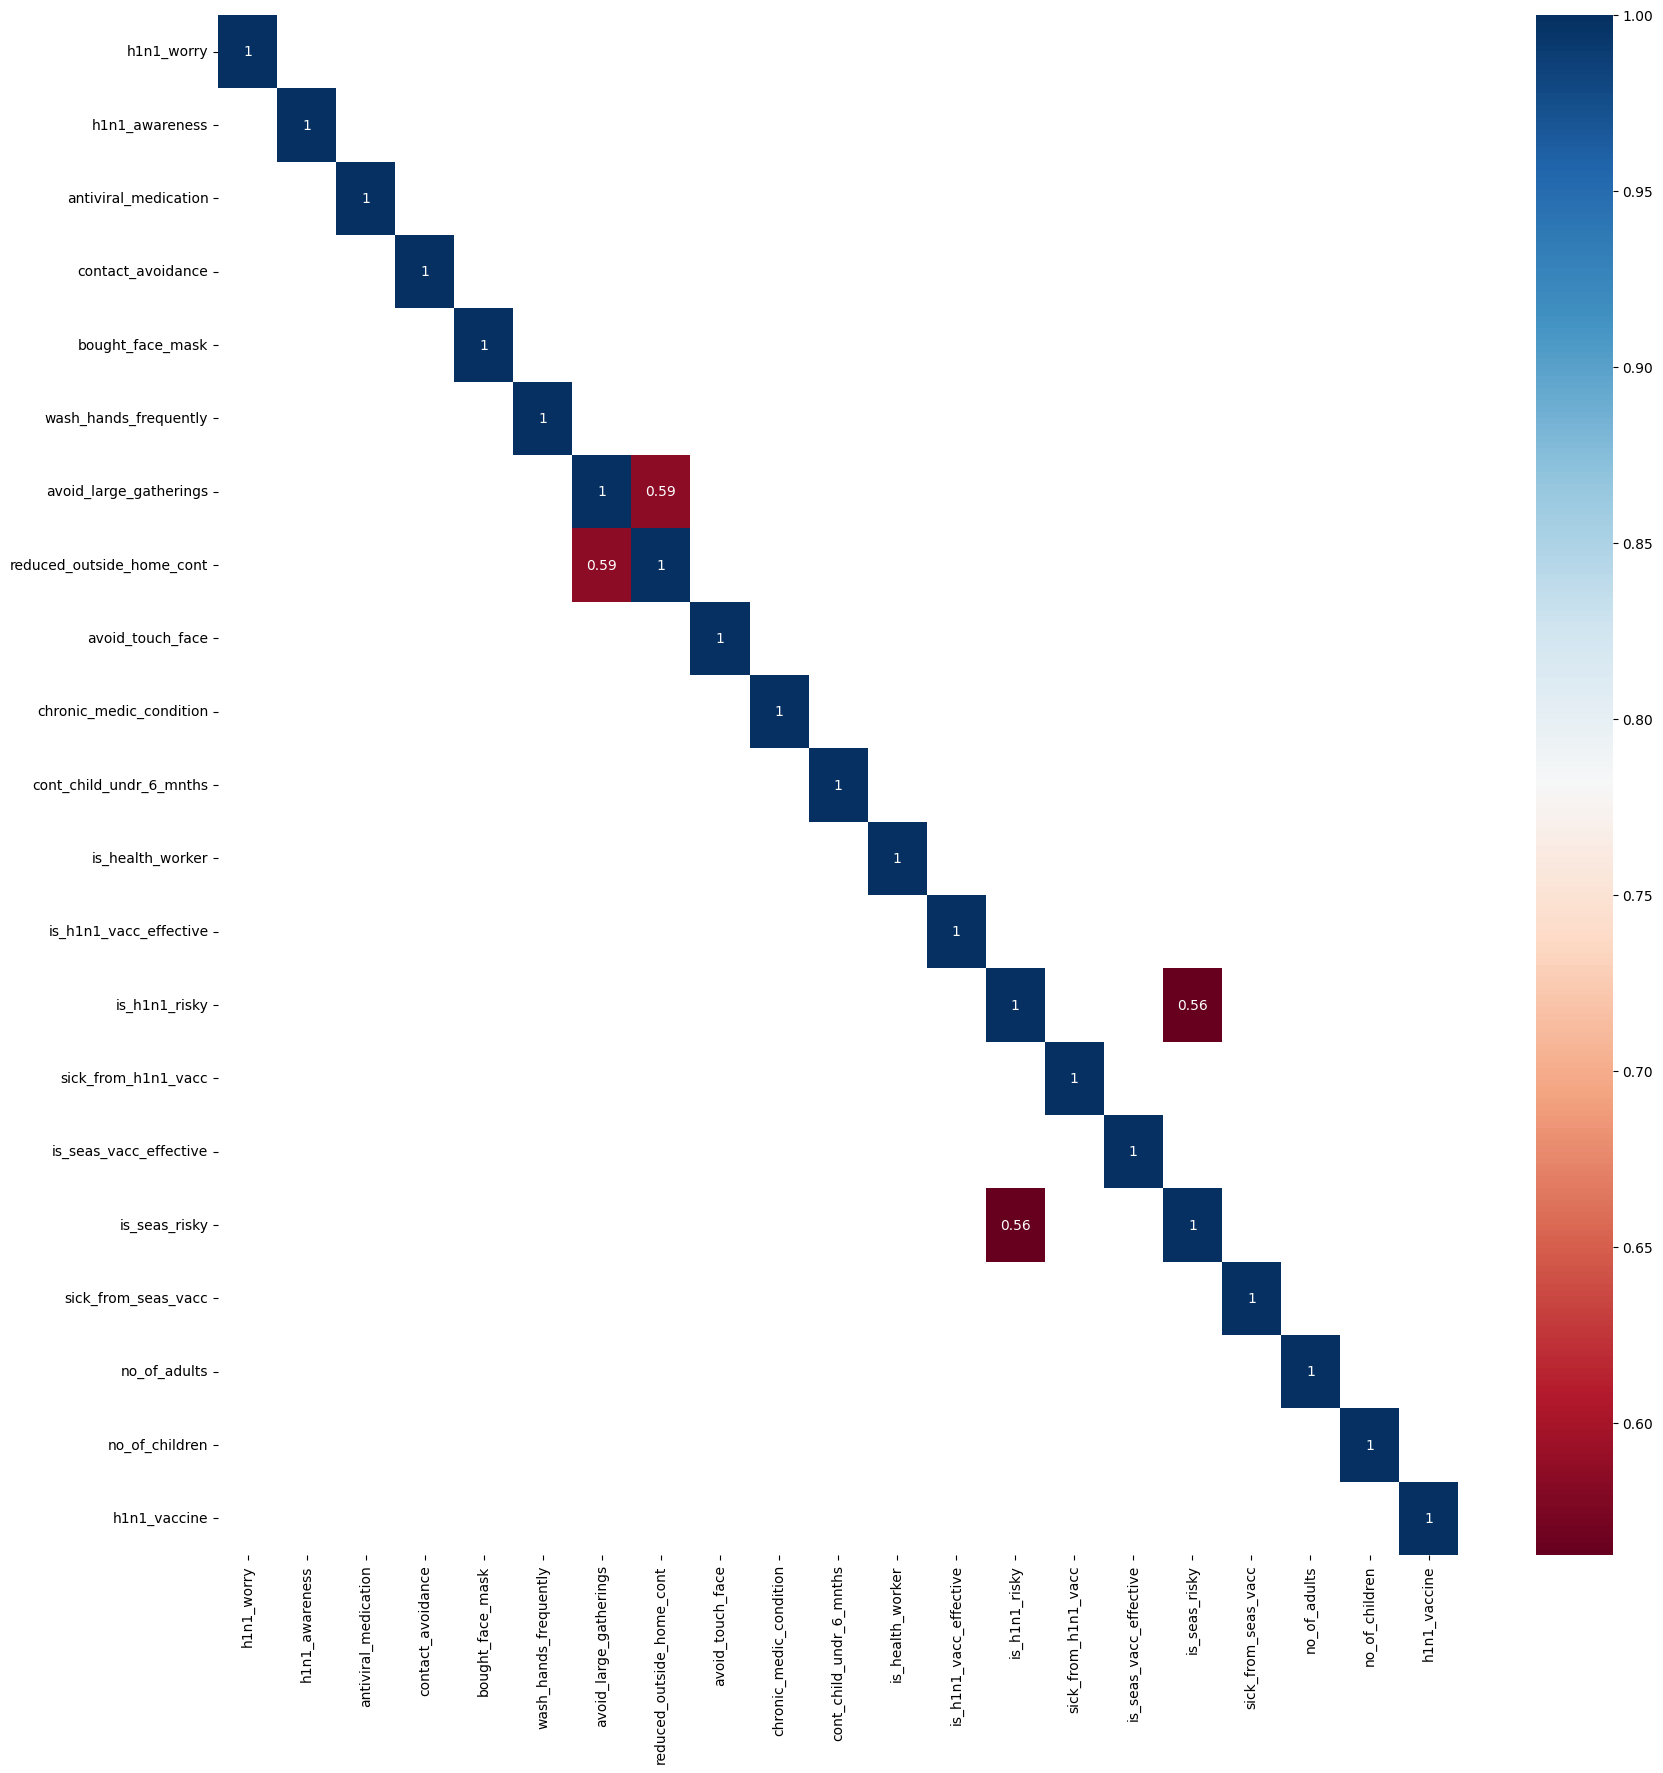

In [21]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

### EDA

In [22]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

#### Extract binary categorical columns and non-binary categorical columns

In [23]:
bin_cat = [i for i in df.columns if df[i].nunique()==2]
print(bin_cat)
non_bin_cat = [i for i in df.columns if df[i].nunique()!=2]
print(non_bin_cat)

['antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'sex', 'marital_status', 'h1n1_vaccine']
['h1n1_worry', 'h1n1_awareness', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']


### Countplot

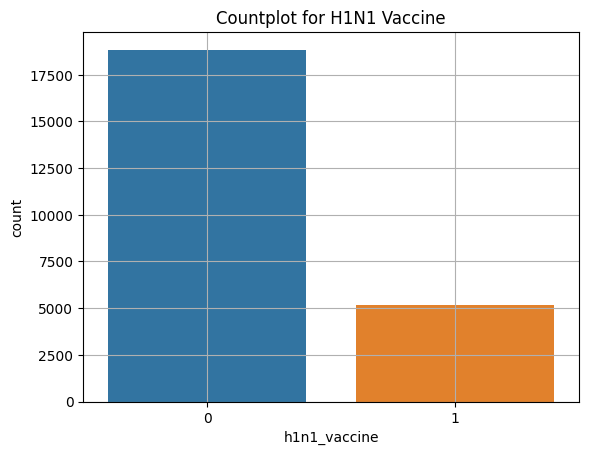

In [24]:
sns.countplot(x = df['h1n1_vaccine'])
plt.title('Countplot for H1N1 Vaccine')
plt.grid()
plt.show()

In [24]:
print(bin_cat)
print(non_bin_cat)

['antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'sex', 'marital_status', 'h1n1_vaccine']
['h1n1_worry', 'h1n1_awareness', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']


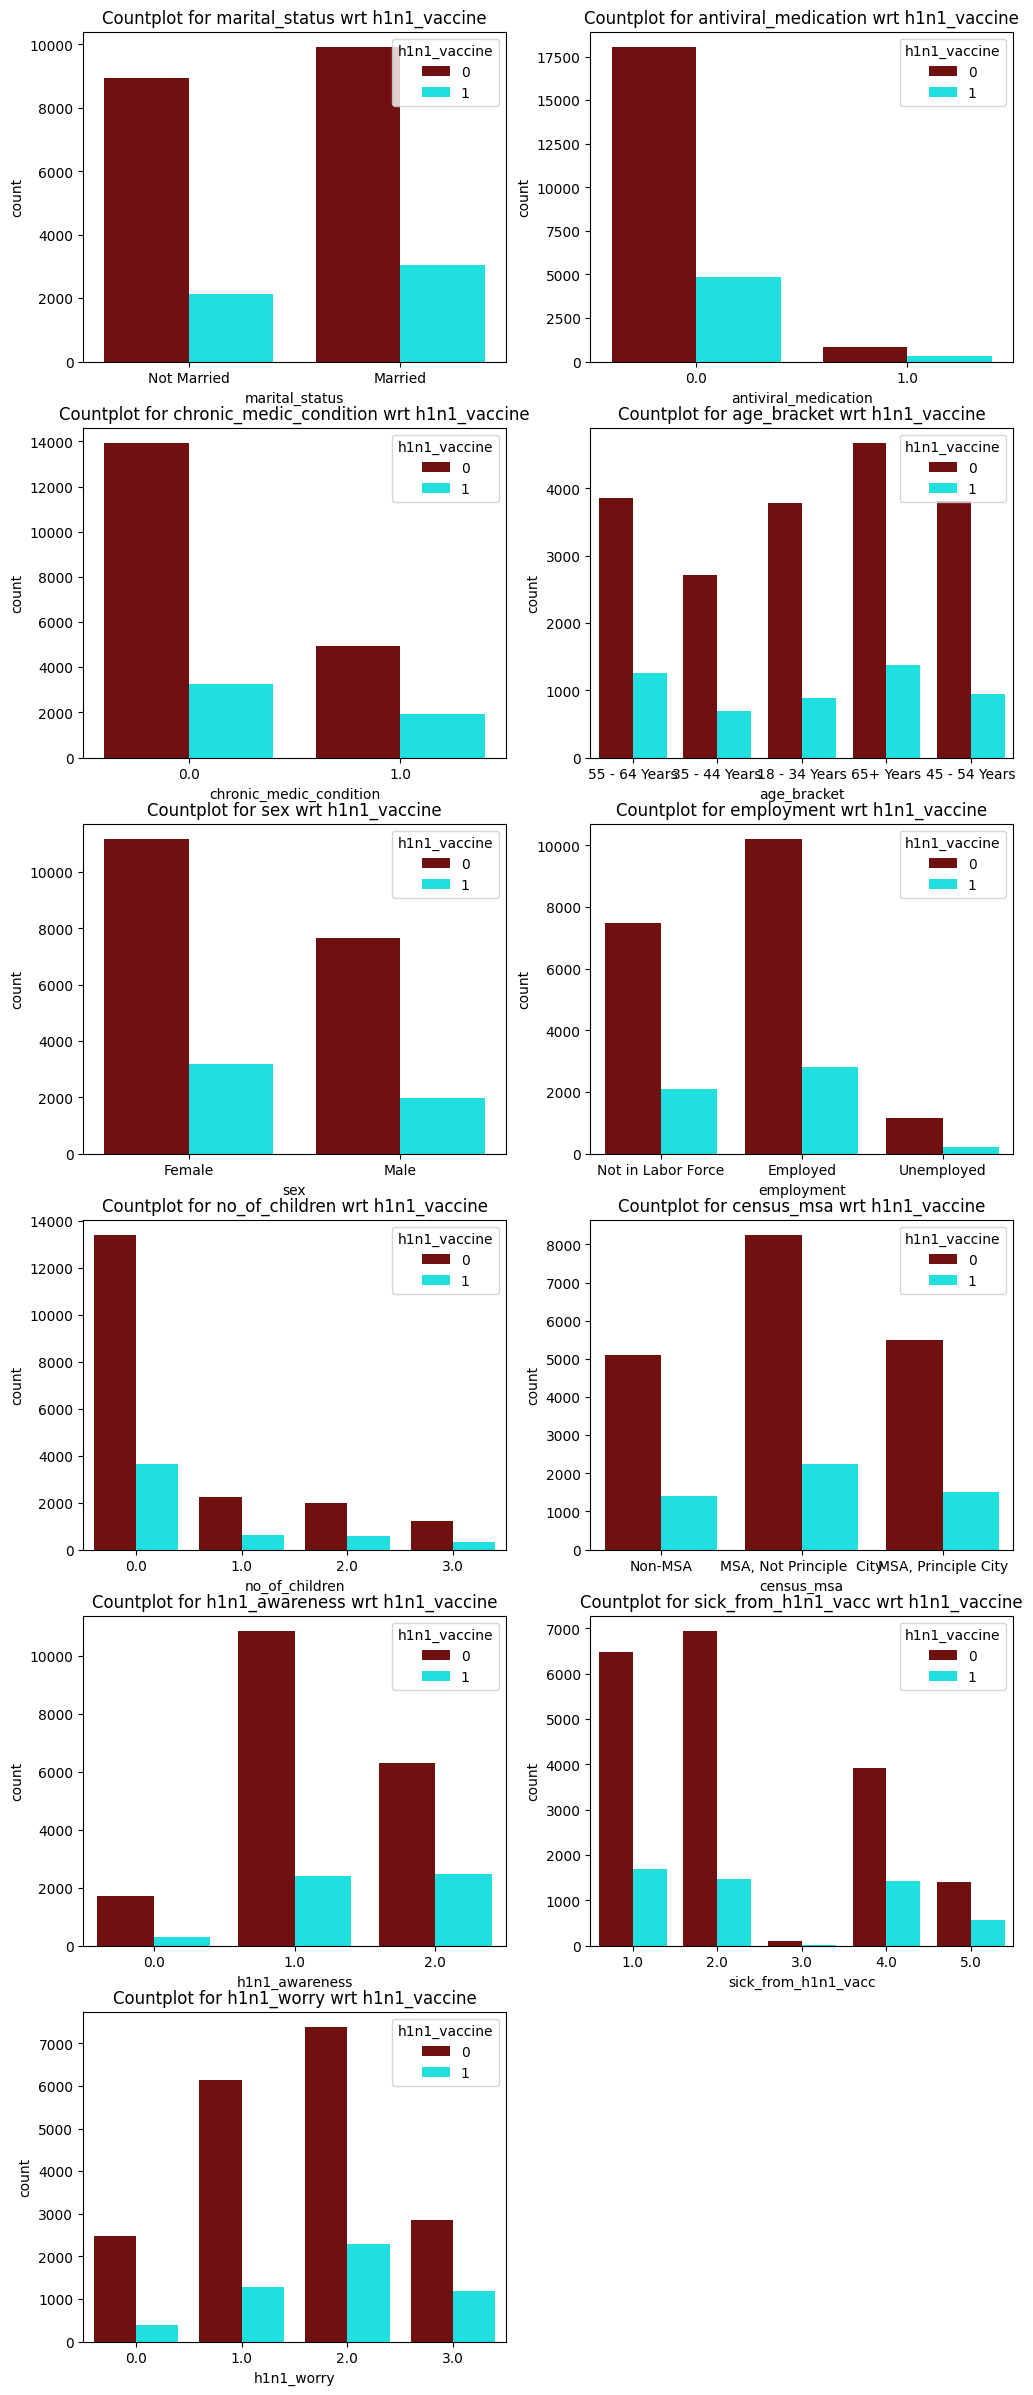

In [25]:
cols_for_countplot = ['marital_status','antiviral_medication','chronic_medic_condition',
                     'age_bracket','sex','employment','no_of_children','census_msa',
                     'h1n1_awareness','sick_from_h1n1_vacc','h1n1_worry']

plt.figure(figsize=(12,30))
for i in range(0,len(cols_for_countplot)):
    plt.subplot(6,2,i+1)
    sns.countplot(x = df[cols_for_countplot[i]],hue=df['h1n1_vaccine'],
                  palette=['maroon','cyan'])
    plt.title(f'Countplot for {cols_for_countplot[i]} wrt h1n1_vaccine')
plt.show()

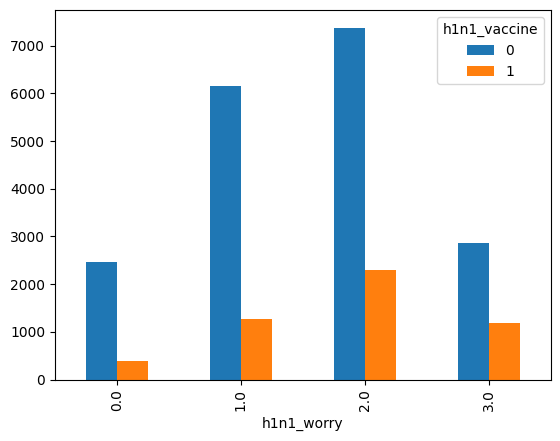

In [26]:
pd.crosstab(df['h1n1_worry'],df['h1n1_vaccine']).plot(kind='bar')
plt.show()

#### Encoding Catgeorical Features

In [27]:
df.shape

(24002, 28)

In [28]:
# cat_cols = df.dtypes[df.dtypes=='object'].index
# OR
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [29]:
print(len(num_cols)+len(cat_cols))

28


In [31]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(len(df_dum.columns))
df_dum.columns

37


Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype='object')

In [32]:
df_dum.dtypes.value_counts()

float64    20
uint8      16
int64       1
dtype: int64

#### Select x(independent feature) and y(depenndet feature)

In [33]:
x = df_dum.drop('h1n1_vaccine',axis=1)
y = df_dum['h1n1_vaccine']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(24002, 36)
(24002,)


#### Split data into train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16801, 36)
(7201, 36)
(16801,)
(7201,)


In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [37]:
def eval_model(ytest,ypred,model_name):
    cm = confusion_matrix(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print('Confusion mtarix\n',cm)
    print('Classification Report\n',cr)
    pre_sc = precision_score(ytest,ypred)  # pre for 1
    rec_sc = recall_score(ytest,ypred)     # rec for 1
    acc_sc = accuracy_score(ytest,ypred)
    res = pd.DataFrame({'Precision':pre_sc,'Recall':rec_sc,'Accuracy':acc_sc},
                       index=[model_name])
    return res

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [40]:
print('Train Score',lr1.score(x_train,y_train))   # Train acc
print('Test Score',lr1.score(x_test,y_test))      # Test acc

Train Score 0.8150110112493304
Test Score 0.814331342869046


In [42]:
df['h1n1_vaccine'].value_counts()

0    18846
1     5156
Name: h1n1_vaccine, dtype: int64

In [41]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = eval_model(y_test,ypred_lr1,'LogReg(thresh=0.5)')
lr1_res
# [TN FP]
# [FN TP]

Confusion mtarix
 [[5363  308]
 [1029  501]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5671
           1       0.62      0.33      0.43      1530

    accuracy                           0.81      7201
   macro avg       0.73      0.64      0.66      7201
weighted avg       0.79      0.81      0.79      7201



,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.619283,0.327451,0.814331


#### Inference
1) Model performs well on category 0 for h1n1_vaccine.<br>
2) Model cant be relied upto for category 0 for h1n1_vaccine.<br>

In [43]:
print(ypred_lr1[:7])

[0 0 0 1 0 0 0]


In [44]:
from collections import Counter

In [45]:
print(Counter(y_test))
print(Counter(ypred_lr1))

Counter({0: 5671, 1: 1530})
Counter({0: 6392, 1: 809})


In [46]:
ypred_prob = lr1.predict_proba(x_test)
ypred_prob[:7]

array([[0.87352859, 0.12647141],
       [0.84949414, 0.15050586],
       [0.90437232, 0.09562768],
       [0.32683796, 0.67316204],
       [0.88826058, 0.11173942],
       [0.97314827, 0.02685173],
       [0.87375088, 0.12624912]])

#### ROC-AUC (Reciever Operator Characteristics, Area Under Curve)

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve

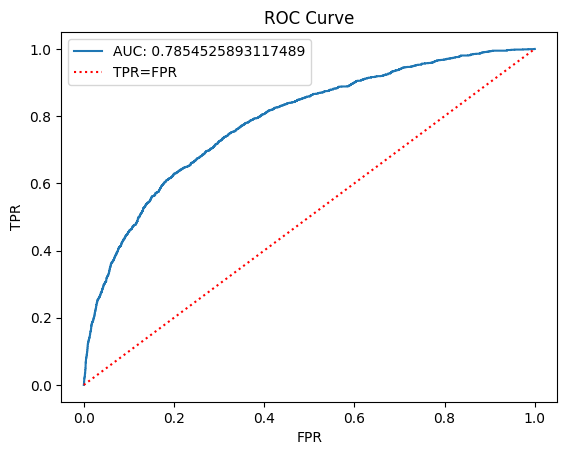

In [52]:
fpr,tpr,thresh = roc_curve(y_test,ypred_prob[:,1])   # ROC curve
auc_score = roc_auc_score(y_test,ypred_prob[:,1])    # AUC_score
plt.plot(fpr,tpr,label='AUC: '+str(auc_score))
plt.plot([0,1],[0,1],color='red',linestyle='dotted',label='TPR=FPR')
plt.title('ROC Curve')
plt.xlabel('FPR')  # FP/(TN+FP)
plt.ylabel('TPR')  # TP/(TP+FN)
plt.legend()
plt.show()


In [56]:
print(len(thresh))
print(thresh)

1907
[1.92356287 0.92356287 0.90965355 ... 0.0040003  0.00393882 0.00329267]


#### Best Threshold

In [57]:
best_thresh1 = thresh[np.argmax(abs(tpr-fpr))]
print(best_thresh1)

0.26994687911716303


#### Generate Predictions at best threhsold

In [58]:
ypred_lr2 = np.where(ypred_prob[:,1]>best_thresh1,1,0)
print(ypred_lr2)

[0 0 0 ... 1 1 0]


In [61]:
acc_lr2 = accuracy_score(y_test,ypred_lr2)  
pre_lr2 = precision_score(y_test,ypred_lr2)  # pre_score for 1
rec_lr2 = recall_score(y_test,ypred_lr2)     # rec_score for 1

lr2_res = pd.DataFrame({'Precision':pre_lr2,'Recall':rec_lr2,'Accuracy':acc_lr2},
                       index=[f'LogReg(th={round(best_thresh1,3)})'])
lr2_res

,Precision,Recall,Accuracy
LogReg(th=0.27),0.458711,0.628105,0.763505


In [62]:
res = pd.concat([lr1_res,lr2_res])
res

,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.619283,0.327451,0.814331
LogReg(th=0.27),0.458711,0.628105,0.763505


### Feature selection Methods
1) Can be applied to both Regression or Classification.

#### RFE (Recursive Feature Elimination)

1) The process involves developing a model with the remaining features after repeatedly removing the least significant features until the desired number of features is obtained.<br>
2) First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable(custom function) <br>
3) Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the remaining set until the desired number of features to select is eventually reached.

In [64]:
from sklearn.feature_selection import RFE

In [66]:
print(x_train.shape)

(16801, 36)


In [109]:
logreg = LogisticRegression(max_iter=10000)

rfe = RFE(logreg, n_features_to_select=24)
rfe = rfe.fit(x_train, y_train)

print(rfe.support_)
print(rfe.ranking_)
print('Extracted Feature',x_train.columns[rfe.support_])

[ True  True  True False  True False  True  True False  True  True  True
  True  True False  True  True False False False False False  True  True
  True  True  True  True  True  True  True  True False False  True False]
[ 1  1  1  7  1  3  1  1  2  1  1  1  1  1  9  1  1  4  8 10 11 12  1  1
  1  1  1  1  1  1  1  1  6 13  1  5]
Extracted Feature Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'bought_face_mask', 'avoid_large_gatherings',
       'reduced_outside_home_cont', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'is_seas_vacc_effective', 'is_seas_risky',
       'age_bracket_55 - 64 Years', 'age_bracket_65+ Years',
       'qualification_< 12 Years', 'qualification_College Graduate',
       'qualification_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'marital_status_Not Married',
       'census_msa_MSA, Principle City'],
      dtyp

In [104]:
len(x_train.columns[rfe.support_])

24

#### LogReg with RFE

In [105]:
lr3 = LogisticRegression(max_iter=10000)
lr3.fit(x_train[x_train.columns[rfe.support_]], y_train)

LogisticRegression(max_iter=10000)

In [106]:
ypred_lr3 = lr3.predict(x_test[x_train.columns[rfe.support_]])

In [107]:
lr3_res = eval_model(y_test,ypred_lr3,'LogReg_RFE')
lr3_res

Confusion mtarix
 [[5371  300]
 [1025  505]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5671
           1       0.63      0.33      0.43      1530

    accuracy                           0.82      7201
   macro avg       0.73      0.64      0.66      7201
weighted avg       0.79      0.82      0.79      7201



,Precision,Recall,Accuracy
LogReg_RFE,0.627329,0.330065,0.815998


In [108]:
res = pd.concat([lr1_res,lr2_res,lr3_res])
res

,Precision,Recall,Accuracy
LogReg(thresh=0.5),0.619283,0.327451,0.814331
LogReg(th=0.27),0.458711,0.628105,0.763505
LogReg_RFE,0.627329,0.330065,0.815998
